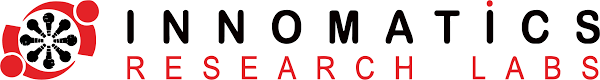

# Innomatics Research Labs Hackathon
## Submitted by:

# Name: Mohammad Wasiq
## Email: `mohammadwasiq0786@gmail.com`, and  `gl0427@myamu.ac.in`
## Date: 11- February -2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
df.isnull().sum()

input     1
output    1
dtype: int64

There is a null value so we can drop that single null value because there is no much effect of that.

In [4]:
df.dropna(inplace= True)

In [5]:
df.isnull().sum()

input     0
output    0
dtype: int64

Now there is no null value in our data set.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


**Description about `input` variable**
* There are `1696` observations in this variable.
* The `minimum` value of this variable is `-134.96`.
* The `maximum` value of this variable is `134.60`.
* The `mean` of this variable is `1.16`.
* The `standard deviation` of this variable is `79.00`.
* The `first quartile` of this variable is `-63.38`.
* The `second quartile` of this variable is `10.20`.
* The `third quartile` of this variable is `70.26`.

**Description about `output` variable**
* There are `1696` observations in this variable.
* The `minimum` value of this variable is `-132.42`.
* The `maximum` value of this variable is `134.42`.
* The `mean` of this variable is `-34.08`.
* The `standard deviation` of this variable is `65.77`.
* The `first quartile` of this variable is `-80.02`.
* The `second quartile` of this variable is `-50.47`.
* The `third quartile` of this variable is `-11.00`.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


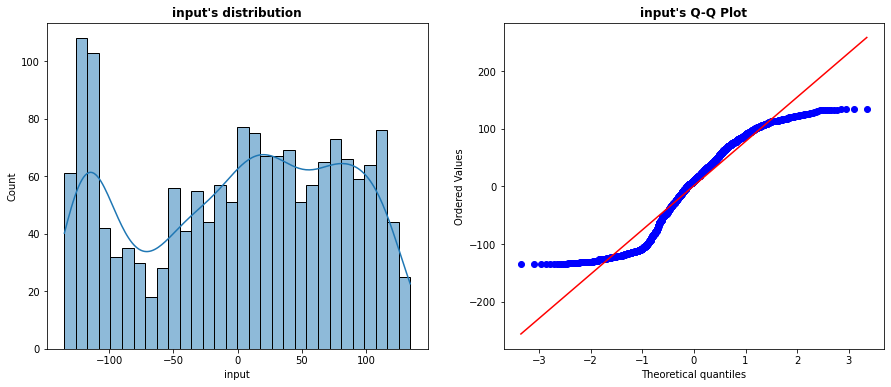

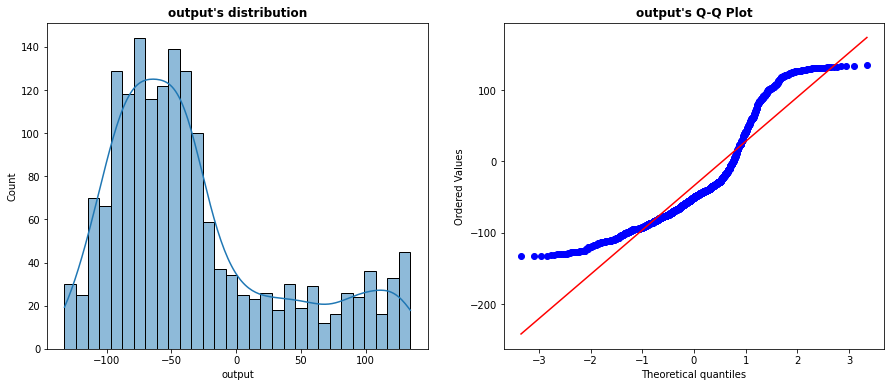

In [10]:
import scipy.stats as stats
for i in df:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(df[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show()

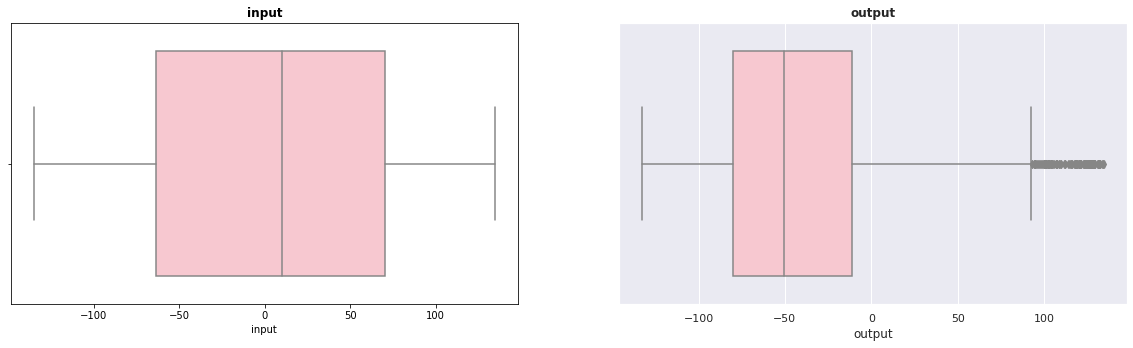

In [11]:
### Checking outliers 

plt.figure(figsize=(20,30))
for i in enumerate(df):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=i[1], color='pink')
    plt.title("{}".format(i[1]), fontweight="bold")

According to above **boxplot** we can easily say that there is no outliers in **input** variable but **input** variable contains outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


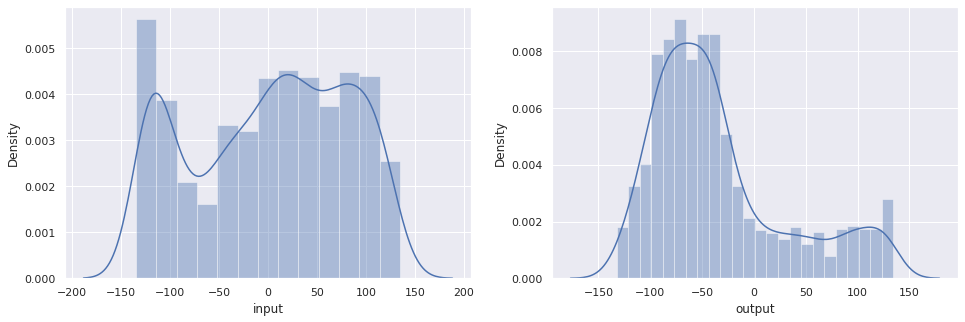

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['input'])
plt.subplot(1,2,2)
sns.distplot(df['output'])
plt.show()

In [14]:
upper_limit = df['output'].quantile(0.99)
lower_limit = df['output'].quantile(0.01)

In [15]:
df['output'] = np.where(df['output'] >= upper_limit,
        upper_limit,
        np.where(df['output'] <= lower_limit,
        lower_limit,
        df['output']))


In [18]:
corr=round(df.corr(),2)
corr

,input,output
input,1.00,0.51
output,0.51,1.00


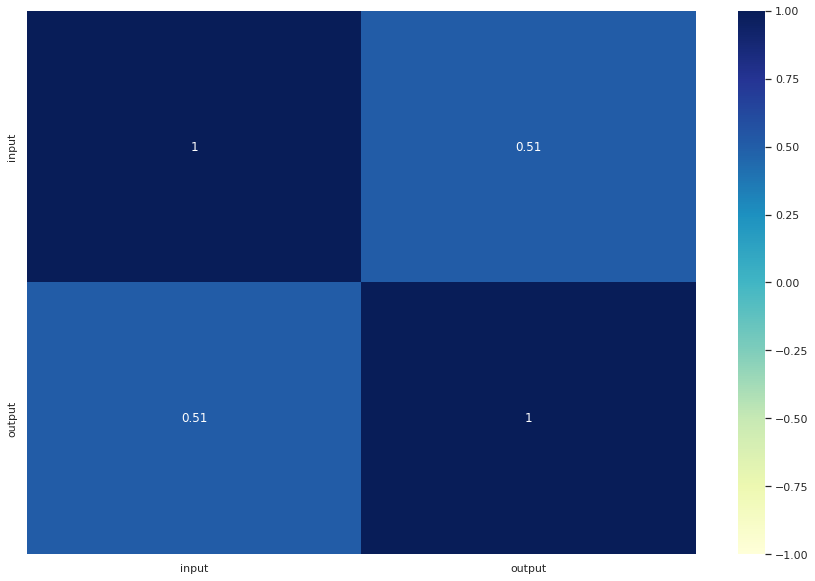

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

## **Model Fitting**

In [21]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 

In [23]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
X.head()

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781


In [24]:
y.head()

0   -127.063611
1   -127.063611
2   -127.063611
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [25]:
# random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [26]:
# both will have same shape
X_train.shape, y_train.shape

((1272, 1), (1272,))

In [27]:
# both will have same shape
X_test.shape, y_test.shape

((424, 1), (424,))

### **Feature Scaling**

In [28]:
scaler= StandardScaler()
scaler

StandardScaler()

In [29]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 1.11192513],
       [ 0.9387124 ],
       [-1.32067249],
       ...,
       [-1.00823222],
       [ 0.35708158],
       [ 0.25556206]])

In [30]:
X_test= scaler.transform(X_test)
X_test

array([[-1.37246002],
       [ 0.1923074 ],
       [-1.3010481 ],
       [-0.78937707],
       [ 1.19062243],
       [-1.57882311],
       [ 0.12422099],
       [-0.29087106],
       [ 1.3424972 ],
       [-1.42662834],
       [-0.81976718],
       [ 1.09710621],
       [ 0.90585904],
       [-1.41298505],
       [-0.32436109],
       [-0.64265412],
       [ 0.69583386],
       [ 1.4067969 ],
       [ 0.13379486],
       [ 0.98931613],
       [ 0.29219071],
       [ 0.56313313],
       [-1.39762861],
       [ 0.4705315 ],
       [ 0.37521618],
       [ 0.42002418],
       [ 1.08215084],
       [-1.39434441],
       [-0.43334704],
       [ 0.96615198],
       [ 0.31840698],
       [-0.91740566],
       [-0.01010751],
       [ 0.2302602 ],
       [ 1.69104036],
       [ 0.52506085],
       [ 1.24233478],
       [ 1.0591795 ],
       [ 0.71247668],
       [-1.41436099],
       [ 1.31406247],
       [-0.76432286],
       [-0.58979942],
       [-0.77159528],
       [ 1.68943862],
       [ 0

### **Model Training & Performance**

In [31]:
# Creating function that will evaluate model
def model_evaluator(actual_val, pred_val, X_test_val):
    """
    The function takes actual value, predicted value and X test value as 
    argument and returns Mean square error, Mean absolute error, Root 
    mean square error, r2 score and adjusted r2 score rounded to 3 decimal 
    places.
    """
    mse= round(mean_squared_error(actual_val, pred_val),3)
    mae= round(mean_absolute_error(actual_val, pred_val),3)
    rmse= round(np.sqrt(mean_squared_error(actual_val, pred_val)),3)
    r2_sco= round(r2_score(actual_val, pred_val),4)
    adj_r2_sco= round(1-(1-r2_sco)*(len(actual_val)-1)/(len(actual_val)-X_test.shape[1]-1),4)
    return mse, mae, rmse, r2_sco, adj_r2_sco

In [32]:
# creating dictionary containing model objects for different algorithmn
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regresion":Lasso(),
    "Elastic-Net Regression":ElasticNet(),
    "Support Vector Regressor":SVR(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Bagging Regressor": BaggingRegressor(base_estimator=LinearRegression()),
    "Extra Tree Regressor": ExtraTreesRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "GradientBoost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
    
}

In [33]:
# Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [34]:
# Creating empty list to store model names
model_list=[]

# creating empty list to store r2 score for each model
r2_score_list=[]

# creating empty list for storing adjusted r2 score
adj_r2_score=[]

# creating list to store mse
mse_list=[]

# creating list to store mae
mae_list=[]

# creating list to store rmse
rmse_list=[]

In [35]:
# Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    # selecting model
    model=list(models.values())[num]
    
    # getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    # Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    # Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    # Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Linear Regression Model

Model Performance for training dataset
Mean Square Error: 3087.874
Mean Absolute Error: 41.81
Root Mean Square Error: 55.569
R2 Score: 0.2575
Adjusted R2 Score: 0.2569
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 3484.475
Mean Absolute Error: 44.21
Root Mean Square Error: 59.029
R2 Score: 0.2677
Adjusted R2 Score: 0.266
**************************************************


Ridge Regression Model

Model Performance for training dataset
Mean Square Error: 3087.874
Mean Absolute Error: 41.809
Root Mean Square Error: 55.569
R2 Score: 0.2575
Adjusted R2 Score: 0.2569
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 3484.664
Mean Absolute Error: 44.211
Root Mean Square Error: 59.031
R2 Score: 0.2676
Adjusted R2 Score: 0.2659
**************************************************


Lasso Regresion Model

Model Performance for training dataset
Mean Square Erro

In [36]:
# for voting Regressor
r1= LinearRegression()
r2= Ridge()
r3= RandomForestRegressor() 
vr= VotingRegressor([('Linear_Regression', r1), ('Ridge', r2), ('Random_Forest_Regressor', r3)])

# Model prediction 
y_pred, pred_val=model_trainer(vr, X_train, y_train, X_test)

# Model evaluation for training data
mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
print("Voting Regressor Model\n")
print("Model Performance for training dataset")
print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
print("-"*50)

# Model evaluation for test data      
mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
print("Model Performance for Test dataset")
print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
# Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
model_list.append('Voting Regressor')
r2_score_list.append(r2_sco)
adj_r2_score.append(adj_r2_sco)
mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)
print("*"*50)
print("\n")

Voting Regressor Model

Model Performance for training dataset
Mean Square Error: 1568.438
Mean Absolute Error: 29.123
Root Mean Square Error: 39.604
R2 Score: 0.6228
Adjusted R2 Score: 0.6225
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 2385.694
Mean Absolute Error: 34.173
Root Mean Square Error: 48.844
R2 Score: 0.4986
Adjusted R2 Score: 0.4974
**************************************************




### **Model Performance and Visulaization**

In [37]:
# Tabulating model performance in dataframe
model_perf= pd.DataFrame(list(zip(model_list, r2_score_list, adj_r2_score, mse_list, mae_list, rmse_list)), columns=['Model', 'R2_score', 'Adjusted R2_score', 'MSE', 'MAE', 'RMSE']).sort_values(by=['R2_score'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,R2_score,Adjusted R2_score,MSE,MAE,RMSE
0,XGBoost Regressor,0.6684,0.6676,1577.694,22.627,39.720
1,GradientBoost Regressor,0.6644,0.6636,1596.724,22.424,39.959
2,AdaBoost Regressor,0.6520,0.6512,1655.545,28.092,40.688
3,Support Vector Regressor,0.6436,0.6428,1695.538,25.256,41.177
4,Extra Tree Regressor,0.6119,0.6110,1846.459,17.713,42.970
5,Random Forest Regressor,0.6117,0.6108,1847.324,21.207,42.981
6,Decision Tree Regressor,0.6045,0.6036,1881.598,18.160,43.377
7,Voting Regressor,0.4986,0.4974,2385.694,34.173,48.844
8,Bagging Regressor,0.2680,0.2663,3482.651,44.156,59.014
9,Linear Regression,0.2677,0.2660,3484.475,44.210,59.029


From above data frame or table we can easily conclude that **Model XGBoost Regressor** is the best model because it has maximaum value of $R^2= 0.6684$ and $R^2_{adj}= 0.6676$ and least values of **MSE,	MAE,	RMSE** are **1577.694,	22.627.	39.720** respectively as compare to others.

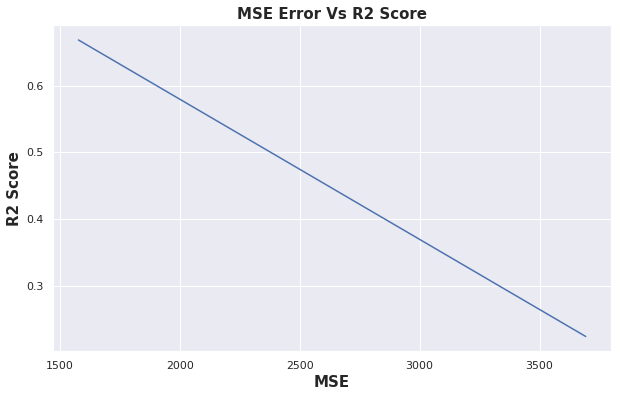

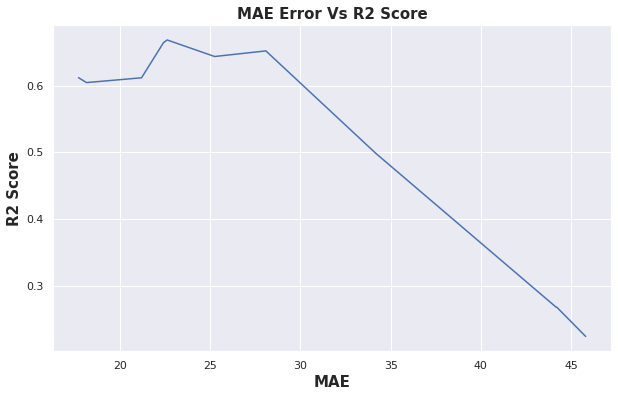

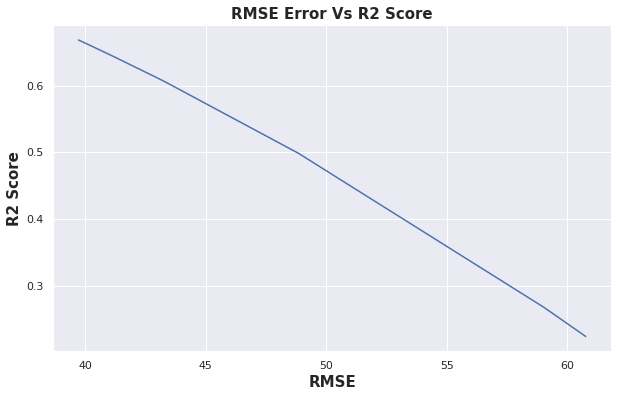

In [38]:
for feature in ['MSE', 'MAE', 'RMSE']:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=feature, y='R2_score', data=model_perf)
    plt.xlabel("{}".format(feature), fontweight='bold', fontsize=15)
    plt.ylabel("R2 Score", fontweight='bold', fontsize=15)
    plt.title("{} Error Vs R2 Score".format(feature), fontweight='bold', fontsize=15)

### **Hyperparameter Tunning**

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [42]:
# Define a dictionary of hyperparameters to search over for each model
param_grid_linear = {'fit_intercept': [True, False], 'normalize': [True, False]}
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_elastic = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.1, 0.5, 1]}
param_grid_dt = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': [None, 2, 3, 4, 5]}
param_grid_rf = {'n_estimators': [10, 20, 30], 'max_depth': [None, 2, 3, 4, 5]}
param_grid_et = {'n_estimators': [10, 20, 30], 'max_depth': [None, 2, 3, 4, 5]}
param_grid_bagging = {'n_estimators': [10, 20, 30]}
param_grid_adaboost = {'n_estimators': [10, 20, 30]}
param_grid_gb = {'n_estimators': [10, 20, 30], 'learning_rate': [0.1, 0.5, 1]}
param_grid_xgb = {'max_depth': [2, 3, 4, 5], 'learning_rate': [0.1, 0.5, 1]}
param_grid_svr = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100]}

models = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(),
          'Lasso Regression': Lasso(),
          'Elastic-Net Regression': ElasticNet(),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Random Forest Regression': RandomForestRegressor(),
          'Extra Trees Regression': ExtraTreesRegressor(),
          'Bagging Regression': BaggingRegressor(),
          'AdaBoost Regression': AdaBoostRegressor(),
          'Gradient Boosting Regression': GradientBoostingRegressor(),
          'Support Vector Regression': SVR(),
          'XGBoost Regression': xgb.XGBRegressor()}

# Define a dictionary of param grids for each model
param_grids = {'Linear Regression': param_grid_linear,
               'Ridge Regression': param_grid_ridge,
               'Lasso Regression': param_grid_lasso,
               'Elastic-Net Regression': param_grid_elastic,
               'Decision Tree Regression': param_grid_dt,
               'Random Forest Regression': param_grid_rf,
               'Extra Trees Regression': param_grid_et,
               'Bagging Regression': param_grid_bagging,
               'AdaBoost Regression': param_grid_adaboost,
               'Gradient Boosting Regression': param_grid_gb,
               'Support Vector Regression': param_grid_svr,
               'XGBoost Regression': param_grid_xgb}

# Loop over each model and its corresponding hyperparameters
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best score for {model_name}: {grid_search.best_score_}')
    print("*"*50)
    print("\n")



Best parameters for Linear Regression: {'fit_intercept': True, 'normalize': True}
Best score for Linear Regression: -3102.123086579766
**************************************************


Best parameters for Ridge Regression: {'alpha': 0.01}
Best score for Ridge Regression: -3102.1231094191526
**************************************************


Best parameters for Lasso Regression: {'alpha': 0.01}
Best score for Lasso Regression: -3102.1268744646986
**************************************************


Best parameters for Elastic-Net Regression: {'alpha': 0.01, 'l1_ratio': 1}
Best score for Elastic-Net Regression: -3102.1268744646986
**************************************************


Best parameters for Decision Tree Regression: {'criterion': 'mse', 'max_depth': 5}
Best score for Decision Tree Regression: -1275.7734343131879
**************************************************


Best parameters for Random Forest Regression: {'max_depth': 5, 'n_estimators': 10}
Best score for Random For

From above information we can easily conclude that **Model XGBoost Regressor** is the best model because it has the best parameters for XGBoost Regression is `{'learning_rate': 0.1, 'max_depth': 2}` and
best score is **`-1182.40`** as compare to others.